# 1. Introducion to data visualization

## 1.1. The need of data visualization
The Anscombe's quartet comprises 4 datasets that have nearly identical simple descriptive statistics, however they appear very differently when plotted. These statistics are:
- Number of observations of $\mathbf{x}$ and $\mathbf{y}$
- Mean of $\mathbf{x}$ and $\mathbf{y}$ ($\mu$)
- Variance of $\mathbf{x}$ and $\mathbf{y}$ ($\sigma^2$)
- Correlation coefficient between $\mathbf{x}$ and $\mathbf{y}$ ($\rho_{\mathbf{x},\mathbf{y}}$)
- Linear regression equation
- Coefficient of determinant ($R^2$)

*Reference: [Wikipedia - Anscombe quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)*

In [1]:
import numpy as np
import pandas as pd

In [2]:
anscombe = pd.read_excel(r'data\anscombe.xlsx')
anscombe

,x1,x2,x3,x4,y1,y2,y3,y4
0,10,10,10,8,8.04,9.14,7.46,6.58
1,8,8,8,8,6.95,8.14,6.77,5.76
2,13,13,13,8,7.58,8.74,12.74,7.71
3,9,9,9,8,8.81,8.77,7.11,8.84
4,11,11,11,8,8.33,9.26,7.81,8.47
5,14,14,14,8,9.96,8.10,8.84,7.04
6,6,6,6,8,7.24,6.13,6.08,5.25
7,4,4,4,19,4.26,3.10,5.39,12.50
8,12,12,12,8,10.84,9.13,8.15,5.56
9,7,7,7,8,4.82,7.26,6.42,7.91


In [3]:
anscombe.describe().loc[['mean', 'std', 'count']]

,x1,x2,x3,x4,y1,y2,y3,y4
mean,9.000000,9.000000,9.000000,9.000000,7.500909,7.500909,7.500000,7.500909
std,3.316625,3.316625,3.316625,3.316625,2.031568,2.031657,2.030424,2.030579
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000


In [4]:
from IPython.display import display, Markdown

md = Markdown('Correlation coefficient between:')
display(md)

for i in range(1,5):
    x = anscombe[f'x{i}']
    y = anscombe[f'y{i}']
    corr = x.corr(y)
    
    md = Markdown(fr'$x_{i}$ and $y_{i}$ is {corr:.4f}')
    display(md)

Correlation coefficient between:

$x_1$ and $y_1$ is 0.8164

$x_2$ and $y_2$ is 0.8162

$x_3$ and $y_3$ is 0.8163

$x_4$ and $y_4$ is 0.8165

In [5]:
from IPython.display import display, Markdown

md = Markdown('Linear regression equation:')
display(md)

for i in range(1,5):
    x = anscombe[f'x{i}']
    y = anscombe[f'y{i}']
    slope, intercept = np.polyfit(x, y, deg=1)
    
    md = Markdown(fr'$y_{i} = {slope:.1f}x_{i} + {intercept:.0f}$')
    display(md)

Linear regression equation:

$y_1 = 0.5x_1 + 3$

$y_2 = 0.5x_2 + 3$

$y_3 = 0.5x_3 + 3$

$y_4 = 0.5x_4 + 3$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

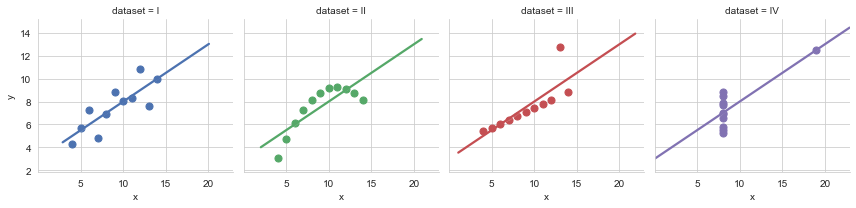

In [7]:
anscombe = sns.load_dataset('anscombe')

_ = sns.lmplot(
    data=anscombe,
    x='x', y='y',
    col='dataset', hue='dataset',
    ci=False, height=3,
    scatter_kws={'s': 50, 'alpha': 1})

## 1.2. Colors

#### Built-in Matplotlib colors
Some nice colors are: `dimgrey`, `indianred`, `tomato`, `goldenrod`, `seagreen`, `teal`, `darkturquoise`, `darkslategrey`, `slategrey`, `royalblue`, `rebeccapurple`.

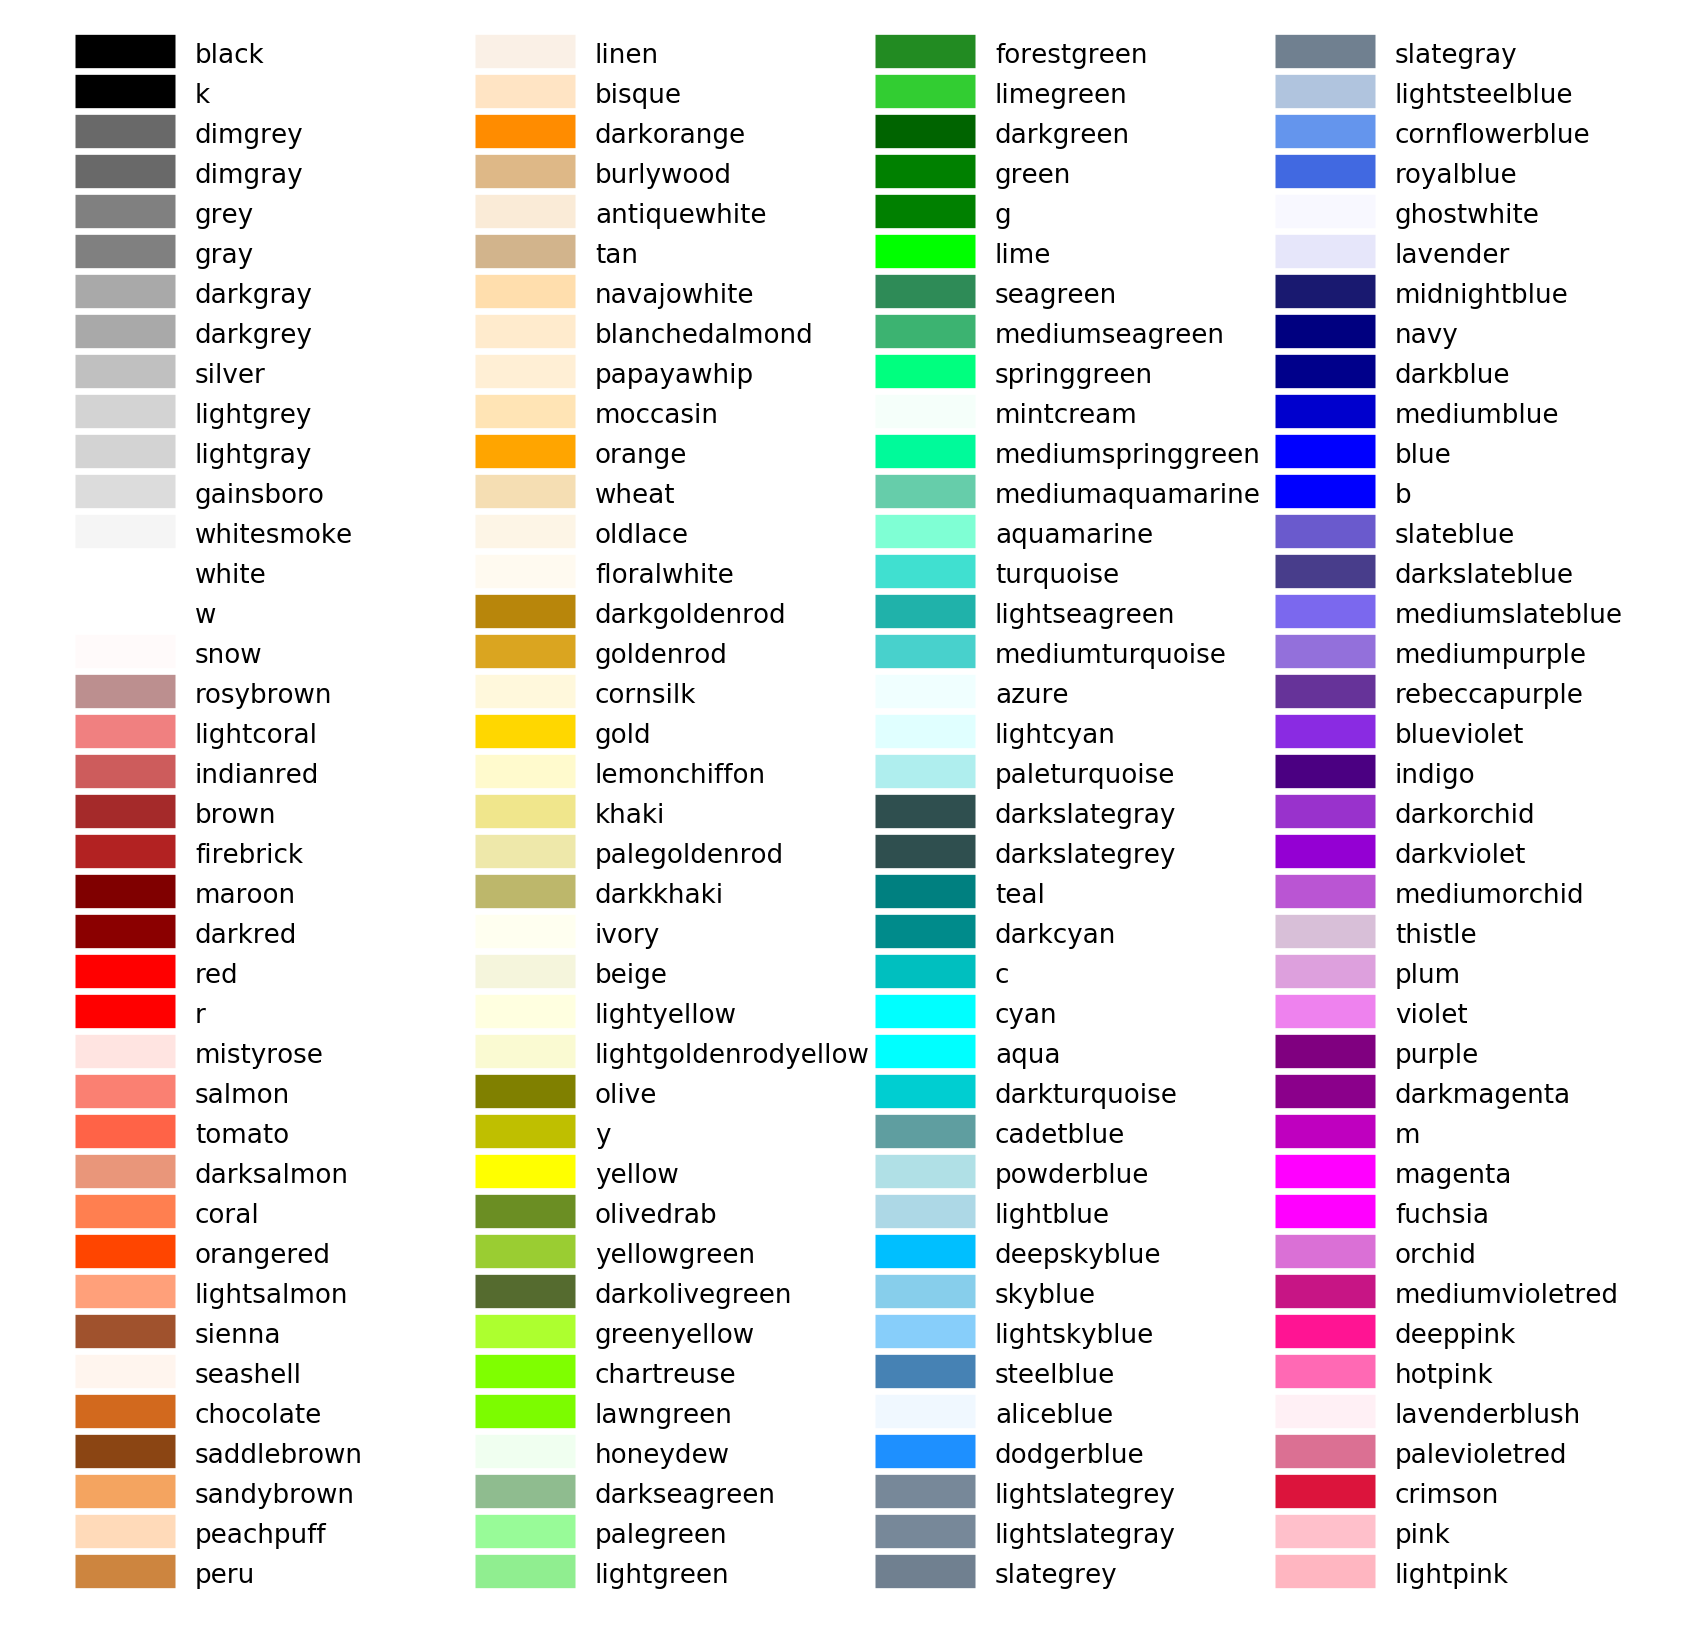

In [8]:
from IPython.display import display, Image
Image(r'image\matplotlib_color_names.png', width=700)
# display(img)

#### More colors

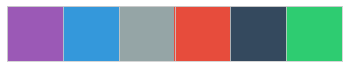

In [9]:
colors = ["#9B59B6", "#3498DB", "#95A5A6", "#E74C3C", "#34495E", "#2ECC71"]
sns.palplot(sns.color_palette(colors))

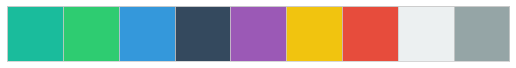

In [10]:
colors = ["#1ABC9C", "#2ECC71", "#3498DB", "#34495E", "#9B59B6", "#F1C40F", "#E74C3C", "#ECF0F1", "#95A5A6"]
sns.palplot(sns.color_palette(colors))

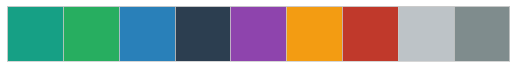

In [11]:
colors = ["#16A085", "#27AE60", "#2980B9", "#2C3E50", "#8E44AD", "#F39C12", "#C0392B", "#BDC3C7", "#7F8C8D"]
sns.palplot(sns.color_palette(colors))

## 1.3. Scales of measurement
Measurement |Type        |Order    |Subtract |Divide   |Example|
:-----------|:-----------|:-------:|:-------:|:-------:|:----|
**Nominal** |Qualitative |         |         |         |Fruits, Gender, Names|
**Ordinal** |Qualitative |&#128504;|         |         |Medals, Satisfaction, Age ranges|
**Interval**|Quantitative|&#128504;|&#128504;|         |Date, Temperature, Scores|
**Ratio**   |Quantitative|&#128504;|&#128504;|&#128504;|Weight, Height, Time period|

More explanation:
- Ratio is characterized by an absolute zero, which represents the absence of the property being measured. For example: the amount of money can be $0.
- Interval can be subtracted, but you cannot do division on it. For example: 6h00, 12h00 and 18h00 are equally spaced; but saying 12h00 is twice much as 6h00 doesn't make sense.
- Ordinal can be numbers, for example: to measure the satisfaction, you are asked to rate from 1 (very disappointed) from 5 (very pleasant).

In Data Visualization, the three popular data types are *Categorical* (nominal and ordinal), *Date/Time* (interval) and *Value* (ratio).

# 2. Basic charts
Basic charts are simple and easy-to-read, and are very good at reporting. In this section, we focus on analyzing how many dimensions a chart can display.

## 2.1. Pie Chart
Pie Charts show the percentage represented by each category. This type of chart is rarely used in analytics, however they can vary chart shapes in your reports/dashboards. Pie Charts can display 2 variables:

|Dimension|Data type  |
|:--------|:----------|
|x-axis   |Categorical|
|y-axis   |Value      |

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [13]:
world = pd.read_excel(r'data/gapminder.xlsx')
world = world[world.continent != 'Oceania']
world.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


In [14]:
def PieChart(data, x, y, agg=np.sum):    
    data = data.groupby(x)[y].agg(agg).reset_index()    
    plt.figure(figsize=(5,5))
    plt.pie(data[y], labels=data[x], autopct='{:.2f}%'.format)
    plt.show()

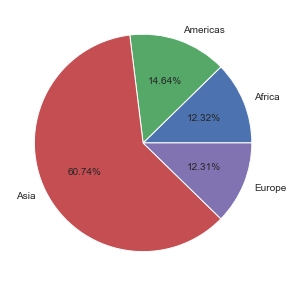

In [15]:
PieChart(world, x='continent', y='pop')

#### Pie matrix

In [16]:
world = pd.read_excel(r'data/gapminder.xlsx')
world = world[world.continent != 'Oceania']
world.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4


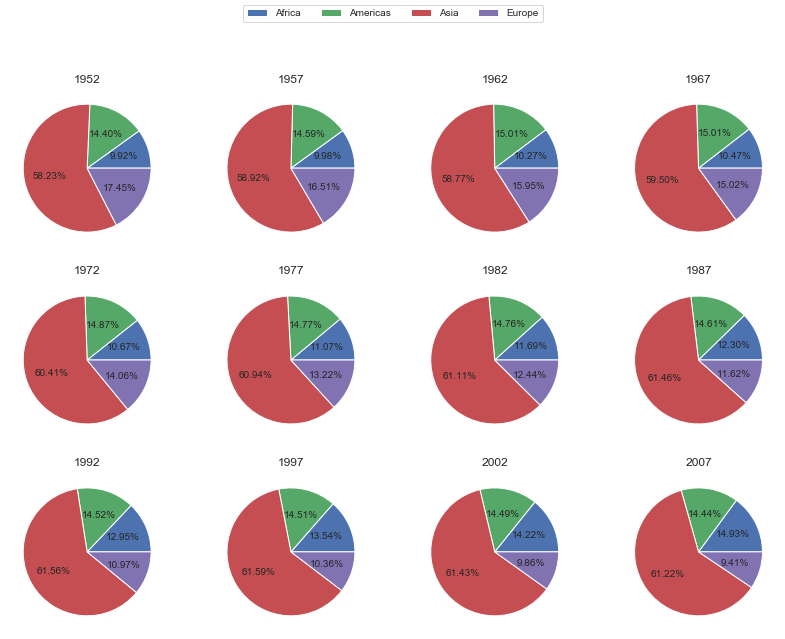

In [17]:
df = world.pivot_table(index='continent', columns='year', values='pop', aggfunc=np.sum)

fig, axes = plt.subplots(ncols=4, nrows=3, figsize=(14,10))
for ax, col in zip(axes.flat, df.columns):
    ax.pie(df[col], autopct='{:.2f}%'.format)
    ax.set(ylabel='', title=col, aspect='equal')

fig.legend(labels=df.index, loc='upper center', ncol=4)
plt.axis('off')

plt.show()

## 2.2. Line Chart
Line Charts are usually used with time series data thanks to the ablity of emphasizing fluctuations, trends, and cycles. Line Charts can display 3 variables:

|Dimension|Data type  |
|:--------|:----------|
|x-axis   |Date       |
|y-axis   |Value      |
|Color    |Categorical|

The x-axis of Line Charts cannot be a Categorical variable.

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [19]:
temp = pd.read_excel(r'data\temperatures.xlsx')
temp = temp.astype({'date': 'datetime64'})
temp.head()

,date,city,temperature
0,2011-10-01,New York,63.4
1,2011-10-01,San Francisco,62.7
2,2011-10-01,Austin,72.2
3,2011-10-02,New York,58.0
4,2011-10-02,San Francisco,59.9


In [20]:
def LineChart(data, x, y, c=None, agg=np.sum, width=15, height=5):
    plt.figure(figsize=(width, height))
    sns.lineplot(data=data, x=x, y=y, hue=c, estimator=agg, linewidth=2)
    plt.show()

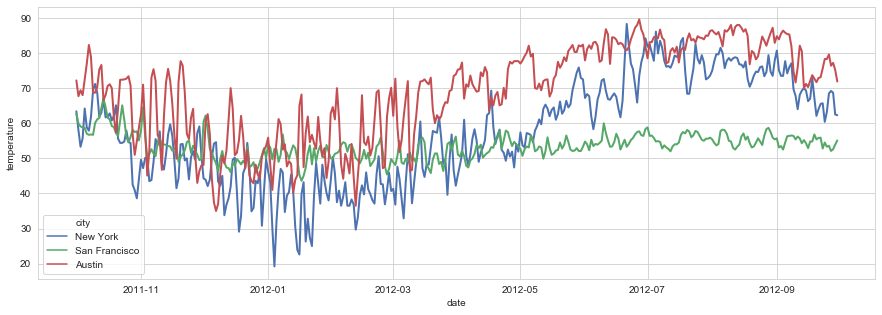

In [21]:
LineChart(data=temp, x='date', y='temperature', c='city', agg=np.median)

## 2.3. Bar Chart
Bar Charts have some variants: Group, Stack and Percent. They are very helpful in comparison, which requires the y-axis to starts from 0. Bar Charts can display 3 variables:

|Dimension|Data type        |
|:--------|:----------------|
|x-axis   |Categorical, Date|
|y-axis   |Value            |
|Color    |Categorical      |

Bar Charts should not be used on time series data such as temperatures and prices.

In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [23]:
sales = pd.read_csv(r'data\supermarket_sales.csv')
sales.head()

,invoice_id,brand,city,customer_type,gender,product_line,unit_price,quantity,tax,date,time,payment,cost,gross_margin_percentage,profit,rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,01/05/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,03/08/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,03/03/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,02/08/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [24]:
def BarChart(data, x, y, c, agg=np.sum, mode='group', orient='vertical', width=9, height=6):
    
    if mode == 'group':
        if orient.startswith('v'):
            plt.figure(figsize=(width, height))
            sns.barplot(data=data, x=x, y=y, hue=c, estimator=agg, ci=False)
            plt.show()
        if orient.startswith('h'):
            plt.figure(figsize=(width, height))
            sns.barplot(data=data, x=y, y=x, hue=c, estimator=agg, ci=False, orient='h')
            plt.show()
        
    if mode == 'stack':
        data = data.pivot_table(index=x, columns=c, values=y, aggfunc=agg)
        if orient.startswith('v'):
            data.plot.bar(stacked=True, figsize=(width, height))
            plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
            plt.show()
        if orient.startswith('h'):
            data.plot.barh(stacked=True, figsize=(width, height))
            plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
            plt.show()
            
    if mode == 'percent':
        data = data.pivot_table(index=x, columns=c, values=y, aggfunc=agg)
        data = data.div(data.sum(1), axis=0)
        if orient.startswith('v'):
            data.plot.bar(stacked=True, figsize=(width, height))
            plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
            plt.show()
        if orient.startswith('h'):
            data.plot.barh(stacked=True, figsize=(width, height))
            plt.legend(bbox_to_anchor=(1.04,1), loc='upper left')
            plt.show()

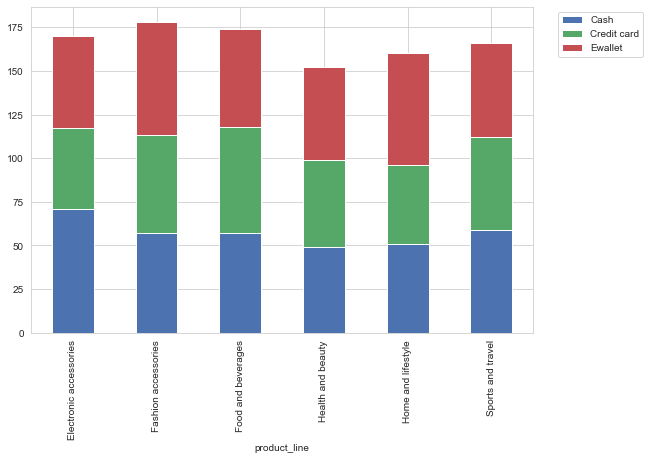

In [25]:
BarChart(data=sales, x='product_line', y='profit', c='payment', mode='stack', orient='v', agg=np.size)

## 2.4. Area Chart
Area Charts are similar to Stack Bar Charts, and they work well on time series data. Area Charts can display 3 variables:

|Dimension|Data type        |
|:--------|:----------------|
|x-axis   |Categorical, Date|
|y-axis   |Value            |
|Color    |Categorical      |

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [27]:
world = pd.read_excel(r'data/gapminder.xlsx')
world = world[world.continent != 'Oceania']
world['gdp'] = world['pop'] * world['gdpPercap']
world.head()

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,gdp
0,Afghanistan,Asia,1952,28.801,8425333,779.445314,AFG,4,6.567086e+09
1,Afghanistan,Asia,1957,30.332,9240934,820.853030,AFG,4,7.585449e+09
2,Afghanistan,Asia,1962,31.997,10267083,853.100710,AFG,4,8.758856e+09
3,Afghanistan,Asia,1967,34.020,11537966,836.197138,AFG,4,9.648014e+09
4,Afghanistan,Asia,1972,36.088,13079460,739.981106,AFG,4,9.678553e+09


In [28]:
def AreaChart(data, x, y, c, agg=np.sum, mode='stack', width=9, height=6):
    data = data.pivot_table(index=x, columns=c, values=y, aggfunc=agg)
    
    if mode == 'stack':
        data.plot.area(stacked=True, figsize=(width, height))
        plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title=c)
        plt.ylabel(y)
        plt.show()
        
    if mode == 'percent':
        data = data.div(data.sum(1), axis=0)
        data.plot.area(stacked=True, figsize=(width, height))
        plt.legend(bbox_to_anchor=(1.04,1), loc='upper left', title=c)
        plt.ylabel(y)
        plt.show()

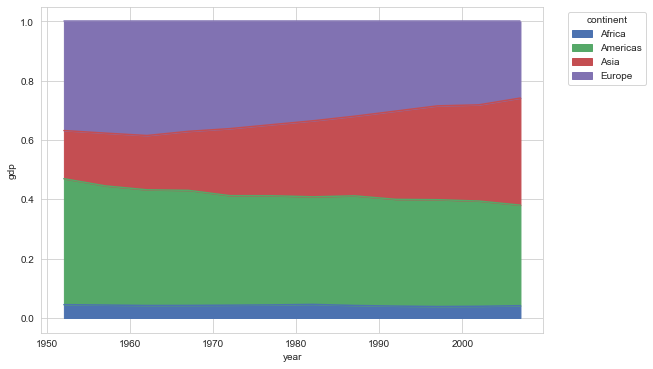

In [29]:
AreaChart(data=world, x='year', y='gdp', c='continent', mode='percent')

## 2.5. Scatter Plot
Scatter Plots are used to visualize the distribution and relationship of two variables. Scatter Plots can display 4 variables:

|Dimension|Data type         |
|:--------|:-----------------|
|x-axis   |Categorical, Value|
|y-axis   |Categorical, Value|
|Color    |Categorical       |
|Size     |Categorical, Value|

Sometimes, letting both color and size represent a single variable is better since differences are emphasized. If a categorical variale is assigned to one of the two axes, a variant of Scatter Plot called Swarm Plot may be the better choice.

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [31]:
car = pd.read_excel(r'data\cars.xlsx')
car.head()

,manufacturer,model,type,min_price,price,max_price,mpg_city,mpg_highway,airbags,drive_train,...,passengers,length,wheelbase,width,turn_circle,rear_seat_room,luggage_room,weight,origin,make
0,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier
1,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,...,5,184,103,68,39,26.0,14.0,2785,USA,Chevrolet Corsica
2,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,Rear,...,4,193,101,74,43,25.0,13.0,3240,USA,Chevrolet Camaro
3,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV


In [32]:
def ScatterPlot(data, x, y, c=None, s=None, agg=np.sum, opacity=0.8, width=10, height=5):
    plt.figure(figsize=(width, height))
    sns.scatterplot(data=data, x=x, y=y, hue=c, size=s, s=100, alpha=opacity, sizes=(100,1000))

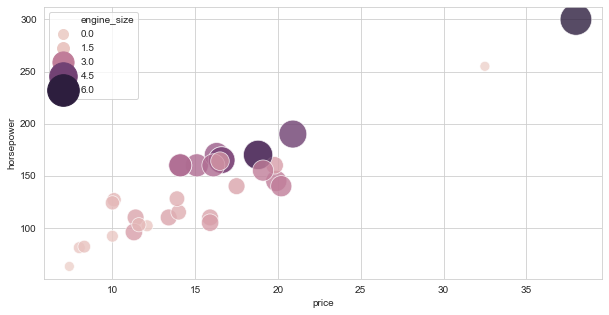

In [33]:
ScatterPlot(data=car, x='price', y='horsepower', c='engine_size', s='engine_size')

#### Swarm Plot
Swarm Plot is the non-overlap version of Scatter Plot. When either x-axis or y-axis is a categorical variable or when the dataset is very large, Swarm Plot may be more useful than original Scatter Plot.

In [34]:
iris = sns.load_dataset('iris')
iris = pd.melt(iris, 'species', var_name='measurement')
iris.head()

,species,measurement,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0


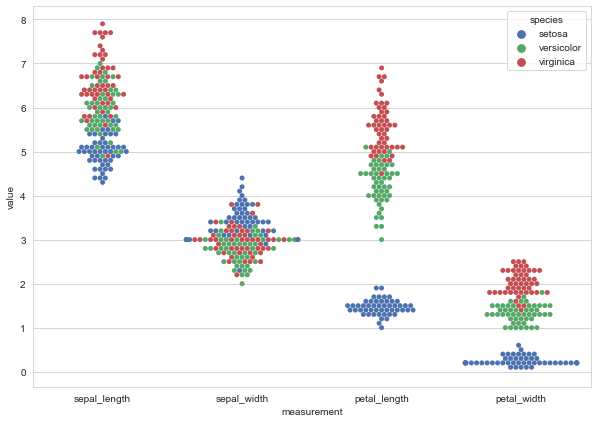

In [35]:
plt.figure(figsize=(10,7))
_ = sns.swarmplot(data=iris, x='measurement', y='value', hue='species')

# 3. Statistical charts
Statistical charts do not focus on the number of dimensions, but they give Data Scientist a very deep understanding of the data. Statistical charts require good analytical skills to read, and are widely used in data analytics.

## 3.1. Heat Map
Heat Maps highlight values (large or small, negative or positive). Despite Heat Maps are very simple, they always go with a statistical table such as *correlation matrix* or *pivot table* and become very powerful in summarizing data. Depend on the values range, either a *sequential palette* or a *diverging palette* may be suitable.

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [37]:
car = pd.read_excel(r'data\cars.xlsx')
car.head()

,manufacturer,model,type,min_price,price,max_price,mpg_city,mpg_highway,airbags,drive_train,...,passengers,length,wheelbase,width,turn_circle,rear_seat_room,luggage_room,weight,origin,make
0,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier
1,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,...,5,184,103,68,39,26.0,14.0,2785,USA,Chevrolet Corsica
2,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,Rear,...,4,193,101,74,43,25.0,13.0,3240,USA,Chevrolet Camaro
3,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV


#### Correlation matrix
The correlation coefficient of each pair of variables is:

$$
\rho_{\mathbf{x},\mathbf{y}} =
\frac{1}{n} \sum_{i=1}^{n}{\frac{(\mathbf{x}_i-\mu_{\mathbf{x}})(\mathbf{y}_i-\mu_{\mathbf{y}})}{\sigma_{\mathbf{x}}\sigma_{\mathbf{y}}}}
$$

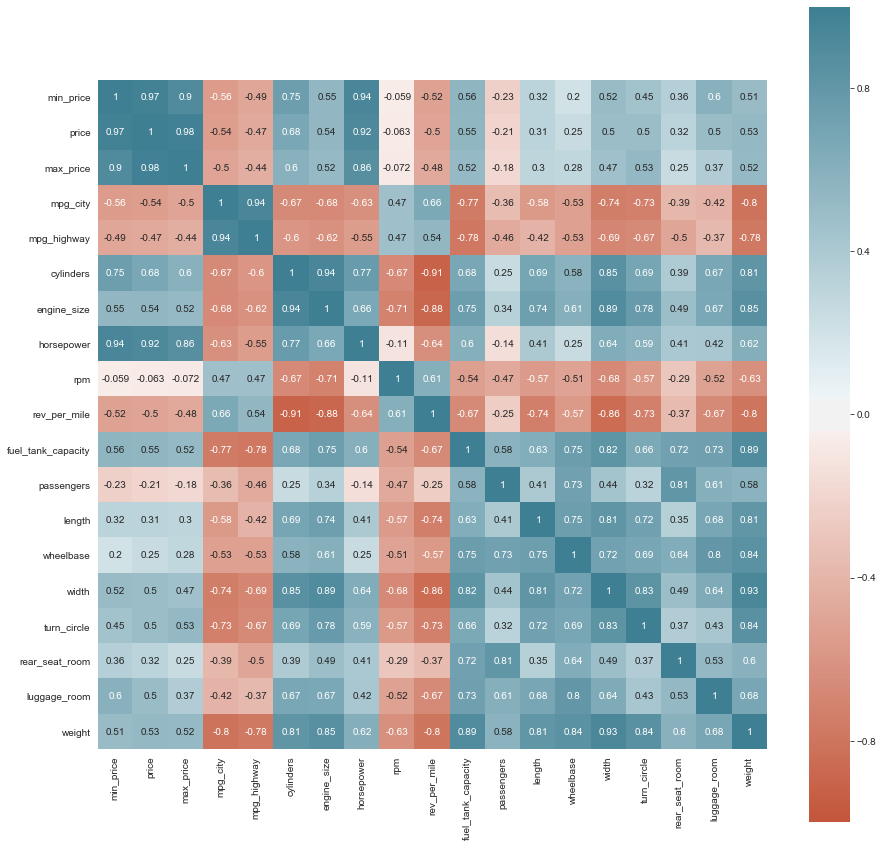

In [38]:
palette = sns.diverging_palette(20, 220, as_cmap=True)

plt.figure(figsize=(15,15))
sns.heatmap(
    car.corr(), square=True, annot=True,
    cmap=palette,
    vmin=-1, vmax=1,
)
plt.show()

# linecolor='white'
# linewidth=0.1

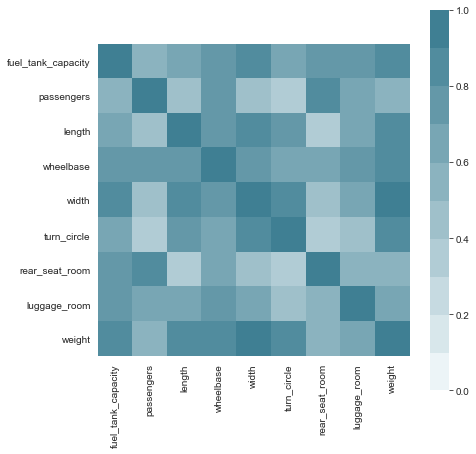

In [39]:
subset = [
    'fuel_tank_capacity', 'passengers', 'length', 'wheelbase', 'width',
    'turn_circle', 'rear_seat_room', 'luggage_room', 'weight'
]

palette = sns.diverging_palette(20, 220, n=20)[10:]

plt.figure(figsize=(7,7))
sns.heatmap(
    car[subset].corr(), square=True,
    cmap=palette,
    vmin=0, vmax=1,
)
plt.show()

#### Data summarizing

In [40]:
car.head()

,manufacturer,model,type,min_price,price,max_price,mpg_city,mpg_highway,airbags,drive_train,...,passengers,length,wheelbase,width,turn_circle,rear_seat_room,luggage_room,weight,origin,make
0,Chevrolet,Cavalier,Compact,8.5,13.4,18.3,25,36,None,Front,...,5,182,101,66,38,25.0,13.0,2490,USA,Chevrolet Cavalier
1,Chevrolet,Corsica,Compact,11.4,11.4,11.4,25,34,Driver only,Front,...,5,184,103,68,39,26.0,14.0,2785,USA,Chevrolet Corsica
2,Chevrolet,Camaro,Sporty,13.4,15.1,16.8,19,28,Driver & Passenger,Rear,...,4,193,101,74,43,25.0,13.0,3240,USA,Chevrolet Camaro
3,Chevrolet,Lumina,Midsize,13.4,15.9,18.4,21,29,None,Front,...,6,198,108,71,40,28.5,16.0,3195,USA,Chevrolet Lumina
4,Chevrolet,Lumina_APV,Van,14.7,16.3,18.0,18,23,None,Front,...,7,178,110,74,44,30.5,NaN,3715,USA,Chevrolet Lumina_APV


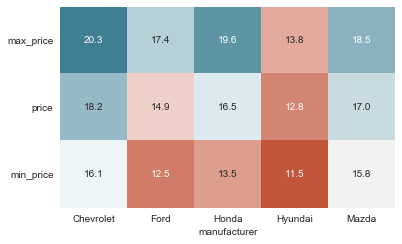

In [41]:
data = car.groupby('manufacturer').mean()[['max_price', 'price', 'min_price']].T
palette = sns.diverging_palette(20, 220, as_cmap=True)

plt.figure(figsize=(6,6))
g = sns.heatmap(
    data, square=True, annot=True,
    cmap=palette, cbar=False, fmt='.1f'
)
g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.show()

## 3.2. Histogram
A Histogram represents the distribution of a numerical variable. It counts how many observations fall into each bin (which is a range of values) and displays each bin as a bar. Notice that Histograms look similar to Bar Charts, but they deliver completely different infomation.

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

#### Basic Histogram
Given a vector $\mathbf{x}$ of $n$ observations, we can easily calculated the $\mbox{IQR}$ (interquartile range). The suggested width of each bin $h$ is calculated using the Freedman-Diaconis's formula:
$$h = \frac{2\cdot\mbox{IQR}}{\sqrt[3]{n}}$$

The number of bins $k$ is:
$$k = \biggl\lceil \frac{\mathbf{x}_{max}-\mathbf{x}_{min}}{h} \biggr\rceil $$

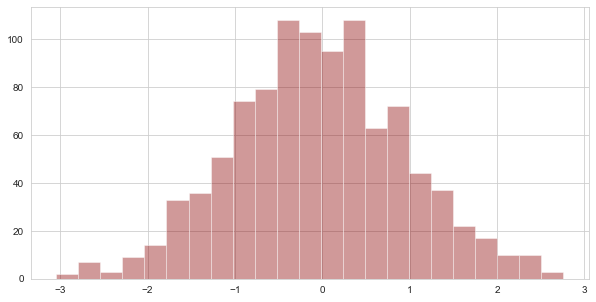

In [43]:
np.random.seed(0)
x = np.random.normal(size=1000)

plt.figure(figsize = (10,5))
_ = sns.distplot(x, color='darkred', kde=False)

#### Kernel Density Estimation
Kernel Density Estimation (KDE) is a method to estimate the Probability Density Function (PDF) of the sample. The approach of this method is to create a kernel function $K(x)$ for every observation. $K(x)$ uses a parameter - bandwidth, denoted $h$ that needs to be optimized. Seaborn uses the Gaussian kernel, which has the equation:

$$K(x) = \frac{1}{h\sqrt{2\pi}} e^{-\frac{1}{2} (\frac{x-x_i}{h})^2}$$

Now we are having $n$ kernels, each one is a normal distribution with the standard deviation $\sigma = h$ and the mean $\mu = x_i$. The KDE is obtained by adding up all kernels, notice that each kernel has the area of 1. The sum is then normalized by dividing $n$, explaining why the KDE has the total area of 1.

$$\mbox{KDE}(x) = \frac{1}{n} \sum_{i=1}^{n}{K(x)}$$

*Reference: [Wikipedia - Kernel density estimation](https://en.wikipedia.org/wiki/Kernel_density_estimation)*

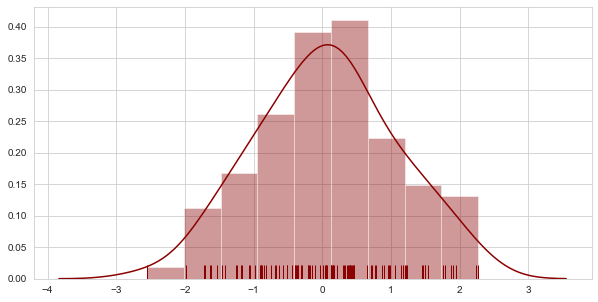

In [44]:
np.random.seed(0)
x = np.random.normal(size=100)

plt.figure(figsize = (10,5))
_ = sns.distplot(x, color='darkred', rug=True)

#### Bivariate Histogram
You can place in each of the axes a single variable, then draw Histogram or a KDE to show how it is distributed. For displaying bivariate distribution, there are a couple of choices: Scatter Plot (with the linear regression line), Hexbin Plot and Heat Map.

In [45]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


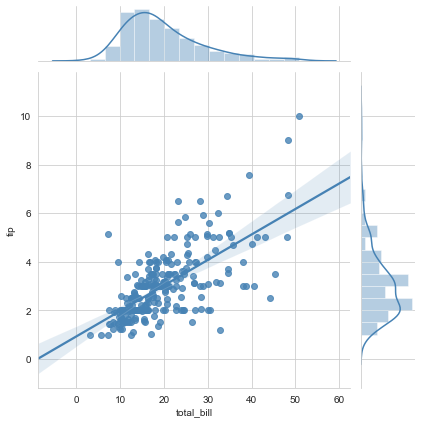

In [46]:
_ = sns.jointplot(data=tips, x='total_bill', y='tip', kind='reg', color='steelblue')

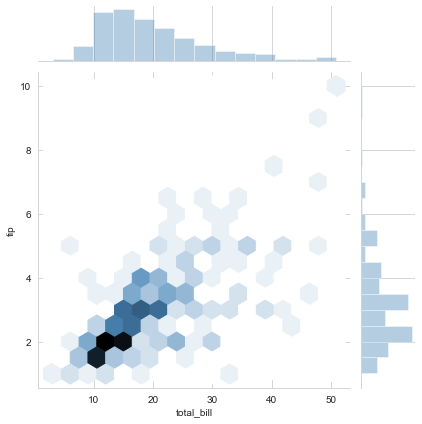

In [47]:
_ = sns.jointplot(data=tips, x='total_bill', y='tip', kind='hex', color='steelblue')

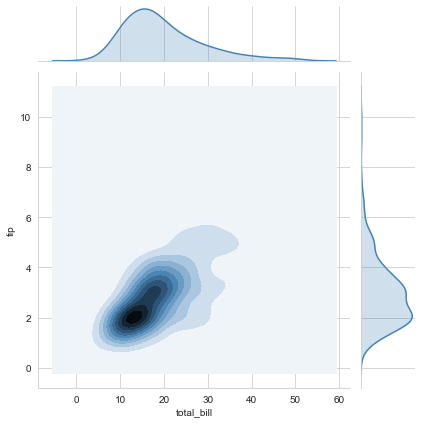

In [48]:
_ = sns.jointplot(data=tips, x='total_bill', y='tip', kind='kde', color='steelblue')

## 3.3. Box Plot
Box Plots are less detailed than Histograms, but they have the ability to emphasize quartiles and outliers.

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

#### Basic Box Plot
Describing a Box Plot:
- The box visualizes the 3 quartiles: $Q_1$, $Q_2$, $Q_3$ as well as the midrange which includes 50% of the data.
- The lower bound is the smaller of either $Q_1-1.5\cdot\mbox{IQR}$ or the minimum.
- The upper bound is the greater of either $Q_3+1.5\cdot\mbox{IQR}$ or the maximum.

Here are some useful information that can be read through Box Plots:
- Looking for potential outliers: An outlier is a data point that is located outside the wiskers.
- Signs of skewness: You can easily conclude that the data is left-skewed, right-skewed or symmetric by comparing $Q_2-Q_1$ and $Q_3-Q_2$.
- Examining how spread the data is: The longer the midrange and the length of wiskers, the wider the distribution is.
- Comparing categories: If the median of a category lies outside of the box of another one, then there is likely to be a difference between the two categories.

In [50]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


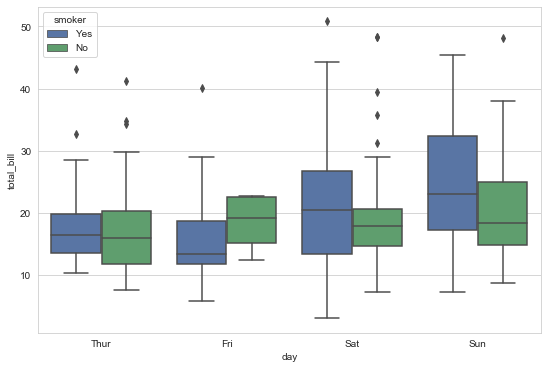

In [51]:
plt.figure(figsize=(9,6))
_ = sns.boxplot(data=tips, x='day', y='total_bill', hue='smoker')

#### Boxen Plot
Boxen Plot (also known as Letter-Value Plot) is the enhanced version of Box Plot. Boxen Plots have more boxes, allow analyzing larger datasets. The method calculating the number of boxes is defined recursively, starting with the median:

$$d_{i+1} = \frac{1+\lfloor d_i \rfloor}{2}$$

where $d_i$ is the depth of each outer group. $d_1$ represents the depth of the median; $d_2$ represents the depth of the 2 quartiles $Q_1$ and $Q_3$.

*Reference: [Hadley Wickham's - Letter value plot](http://vita.had.co.nz/papers/letter-value-plot.pdf)*

In [52]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


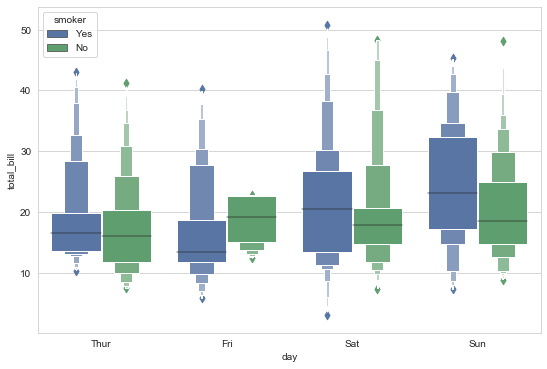

In [53]:
plt.figure(figsize=(9,6))
_ = sns.boxenplot(data=tips, x='day', y='total_bill', hue='smoker')

# 4. Multivariate visualization

## 4.1. Andrews Curves
The Andrews Curves visualizes clusters of high-dimensional data:

|$\mathbf{x}_1$|$\mathbf{x}_2$|$\mathbf{x}_3$|$\mathbf{x}_4$|$\mathbf{x}_5$|...|
|:------:|:-------:|:-------:|:-------:|:-------:|:---:|
|$x_{1,1}$|$x_{2,1}$|$x_{3,1}$|$x_{4,1}$|$x_{5,1}$|...|
|$x_{1,2}$|$x_{2,2}$|$x_{3,2}$|$x_{4,2}$|$x_{5,2}$|...|
|$x_{1,3}$|$x_{2,3}$|$x_{3,3}$|$x_{4,3}$|$x_{5,3}$|...|
|......|
|$x_{1,n}$|$x_{2,n}$|$x_{3,n}$|$x_{4,n}$|$x_{5,n}$|...|

Each observation (row) $\mathbf{x}=(x_1, x_2, x_3,\dots)$ is transformed into a curve using Fourier series as follows:

$$f_x(t) = \frac{x_1}{\sqrt2} + x_2\sin(t) + x_3\cos(t) + x_4\sin(2t) + x_5\cos(2t) + \dots$$

The function is then plotted for $t \in [-\pi, \pi]$.

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [61]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


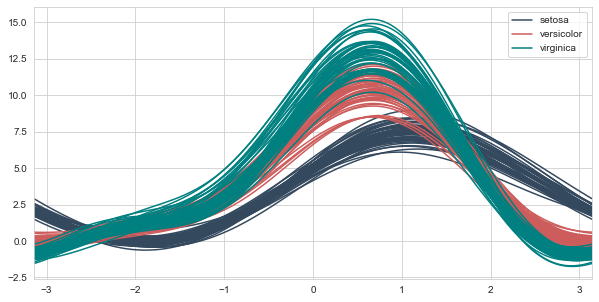

In [62]:
plt.figure(figsize=(10,5))
pd.plotting.andrews_curves(iris, 'species', color=['#34495e', 'indianred', 'teal'])
plt.grid()
plt.show()

## 4.2. Parallel Coordinates Plot
In parallel coordinates, each axis representes a single each variable.

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [64]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


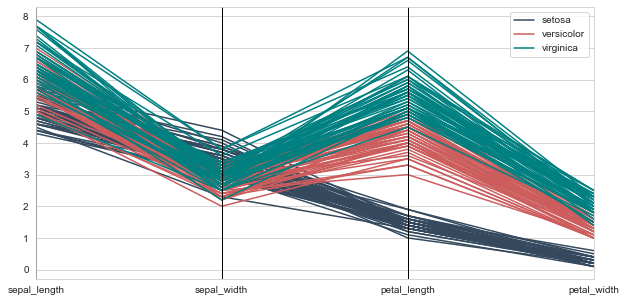

In [65]:
plt.figure(figsize=(10,5))
pd.plotting.parallel_coordinates(iris, 'species', color=['#34495e', 'indianred', 'teal'])
plt.grid()
plt.show()

## 4.3. Facet Grid
Facet Grid is a matrix of plots, where each rows and columns correspond to categories of 2 qualitative variables. The Seaborn `catplot()` function creates a Facet Grid which is a matrix of plots and is able to display up to 5 variables. The `kind` parameter selects the underlying axes-level visualization to use: `'strip'` (default), `'swarm'`, `'box'`, `'boxen'`, `'violin'`, `'point'`, `'bar'` and `'count'`.

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [67]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


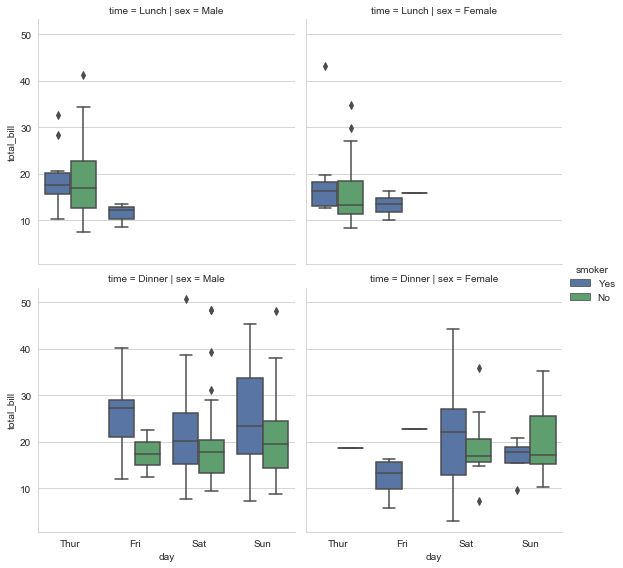

In [68]:
_ = sns.catplot(data=tips, x='day', y='total_bill', hue='smoker', col='sex', row='time', kind='box', height=4)

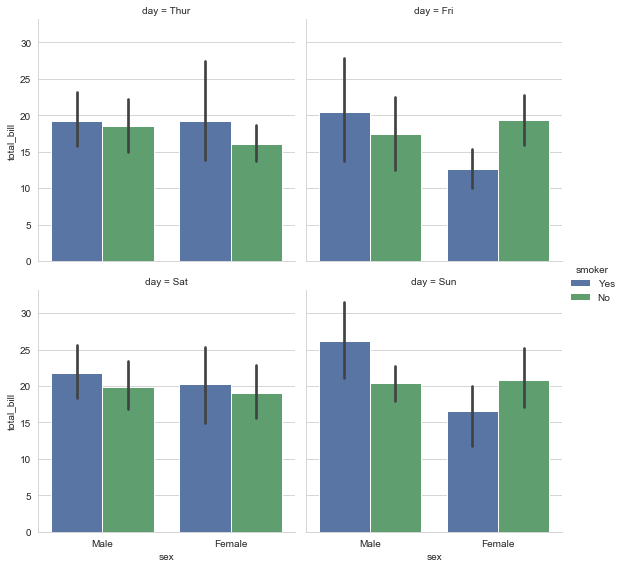

In [69]:
_ = sns.catplot(data=tips, x='sex', y='total_bill', hue='smoker', col='day', kind='bar', col_wrap=2, height=4)

## 4.4. Pair Grid
Similar to Facet Grid, Pair Grid is also a matrix of plots each column and row is assign to a different quantitative variable, resulting the plots show pairwise relationships in the dataset. Pair Grid can be compared with correlation matrix.

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-deep')
sns.set_style('whitegrid')

In [71]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


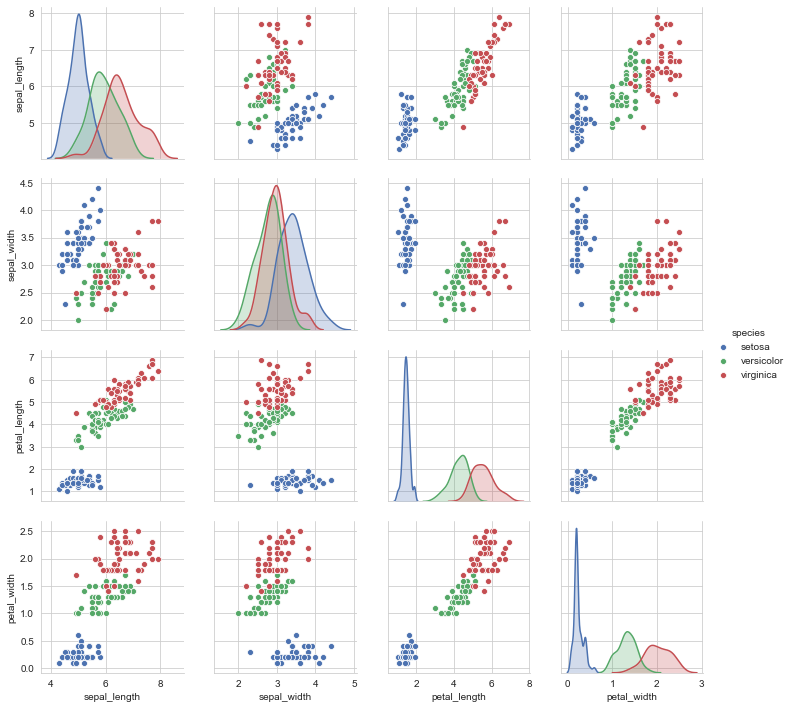

In [72]:
_ = sns.pairplot(data=iris, hue='species')

---
*&#9829; By Quang Hung x Thuy Linh &#9829;*